In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
 'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
 'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
 'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
 'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]}

df = pd.DataFrame(data)

In [295]:
index_price = df['index_price'].to_numpy()
interest_rate = df['interest_rate'].to_numpy()
unemployment_rate = df['unemployment_rate'].to_numpy()

In [296]:
# 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
interest_rate, index_price, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

**선형회귀 : 이자율과 물가지수 상관 관계 분석**

In [297]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.coef_, lr.intercept_)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

[574.45637584] -127.38255033557084
0.8541859618501457
0.941892392945057


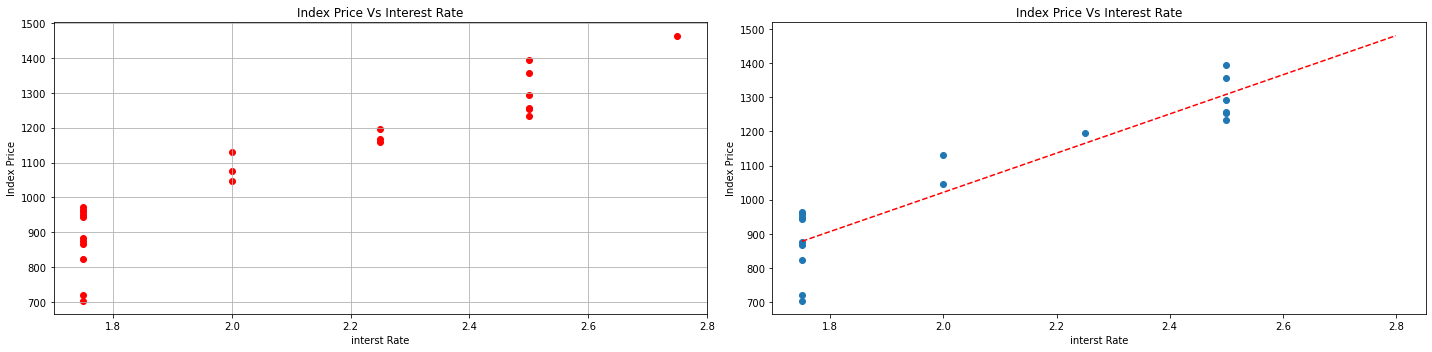

Interest Rate vs. Index Price
coef_: [574.45637584], intercept_: -127.38255033557084
train data score   : 0.8541859618501457
test data score    : 0.941892392945057


In [298]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(interest_rate, index_price, color = 'red')
plt.xlabel('interst Rate')
plt.ylabel('Index Price')
plt.title('Index Price Vs Interest Rate')
plt.grid()


plt.subplot(122)
plt.scatter(train_input, train_target)
plt.plot([1.75,2.8], [1.75*lr.coef_ + lr.intercept_, 2.8*lr.coef_+lr.intercept_],linestyle = '--', color = 'red')
plt.xlabel('interst Rate')
plt.ylabel('Index Price')
plt.title('Index Price Vs Interest Rate')

plt.tight_layout()
plt.show()

print('Interest Rate vs. Index Price')
print('coef_: {}, intercept_: {}'.format(lr.coef_, lr.intercept_))
print('train data score   : {}'.format(lr.score(train_input, train_target)))
print('test data score    : {}'.format(lr.score(test_input, test_target)))



**다항회귀 : 이자율과 물가지수 상관 관계 분석**

In [299]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly[0:5])
print(train_poly.shape, test_poly.shape)

[[3.0625 1.75  ]
 [6.25   2.5   ]
 [3.0625 1.75  ]
 [6.25   2.5   ]
 [6.25   2.5   ]]
(18, 2) (6, 2)


In [300]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)
print('예측값 : ',lr.predict([[2.8**2, 2.8]]))

[-524.84946237 2802.42473118] -2429.1028225806517
예측값 :  [1302.86663978]


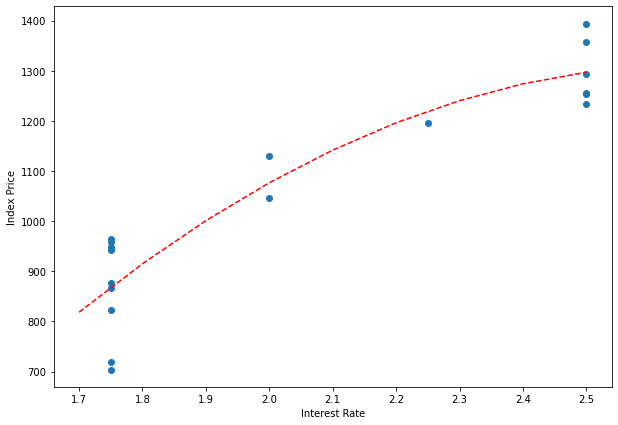

train data score   : 0.8676269364555872
test data score    : 0.7945265214367343


In [301]:
point =np.arange(1.7,2.6, 0.1)

plt.figure(figsize=(10,7))
plt.scatter(train_input, train_target)
plt.plot(point, -524.8*point**2 + 2802.4*point - 2429.1, color = 'red', linestyle = '--')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

print('train data score   : {}'.format(lr.score(train_poly, train_target)))
print('test data score    : {}'.format(lr.score(test_poly, test_target)))



**선형회귀 : 실업율과 물가지수 상관 관계 분석**

In [302]:
# 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
unemployment_rate, index_price, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [303]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.coef_, lr.intercept_)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

[-611.41330166] 4586.05463182898
0.8748908875163574
0.707475113377226


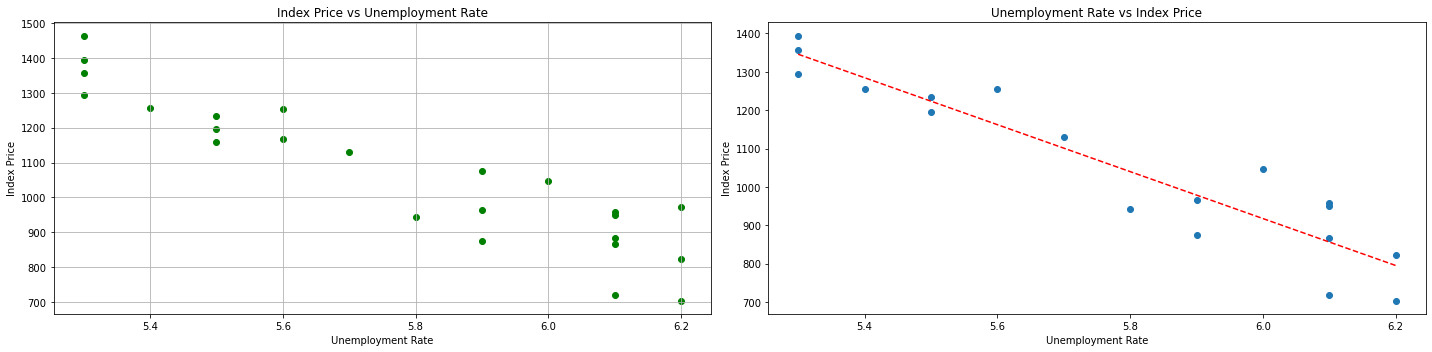

Unemployment Rate vs. Index Price
coef_: [-611.41330166], intercept_: 4586.05463182898
train data score   : 0.8748908875163574
test data score    : 0.707475113377226


In [304]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(unemployment_rate, index_price, color = 'green')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.title('Index Price vs Unemployment Rate')
plt.grid()


plt.subplot(122)
plt.scatter(train_input, train_target)
plt.plot([5.3,6.2], [5.3*lr.coef_ + lr.intercept_, 6.2*lr.coef_+lr.intercept_],linestyle = '--', color = 'red')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.title('Unemployment Rate vs Index Price')

plt.tight_layout()
plt.show()

print('Unemployment Rate vs. Index Price')
print('coef_: {}, intercept_: {}'.format(lr.coef_, lr.intercept_))
print('train data score   : {}'.format(lr.score(train_input, train_target)))
print('test data score    : {}'.format(lr.score(test_input, test_target)))


**다항회귀 : 실업율과 물가지수 상관 관계 분석**

In [305]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly[0:5])
print(train_poly.shape, test_poly.shape)

[[34.81  5.9 ]
 [28.09  5.3 ]
 [38.44  6.2 ]
 [31.36  5.6 ]
 [28.09  5.3 ]]
(18, 2) (6, 2)


In [306]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)

[  -7.26428138 -527.97932022] 4347.248197109266


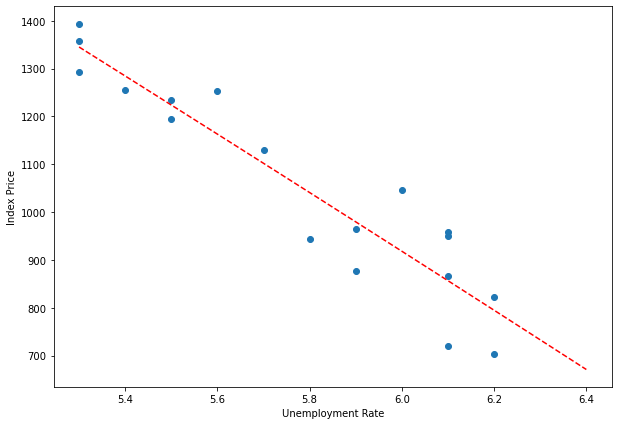

실업율과 물가지수 다항 회귀
다항 회귀 coef_: [  -7.26428138 -527.97932022], intercept_: 4347.248197109266
다항 회귀 train data score   : 0.8748971920999006
다항 회귀 test data score    : 0.7057073065929076


In [307]:
point =np.arange(5.3, 6.4, 0.1)

plt.figure(figsize=(10,7))
plt.scatter(train_input, train_target)
plt.plot(point, -7.26*point**2 - 527.97*point + 4347.2, 
color = 'red', linestyle = '--')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.show()

print('실업율과 물가지수 다항 회귀')
print('다항 회귀 coef_: {}, intercept_: {}'.format(lr.coef_, lr.intercept_))
print('다항 회귀 train data score   : {}'.format(lr.score(train_poly, train_target)))
print('다항 회귀 test data score    : {}'.format(lr.score(test_poly, test_target)))